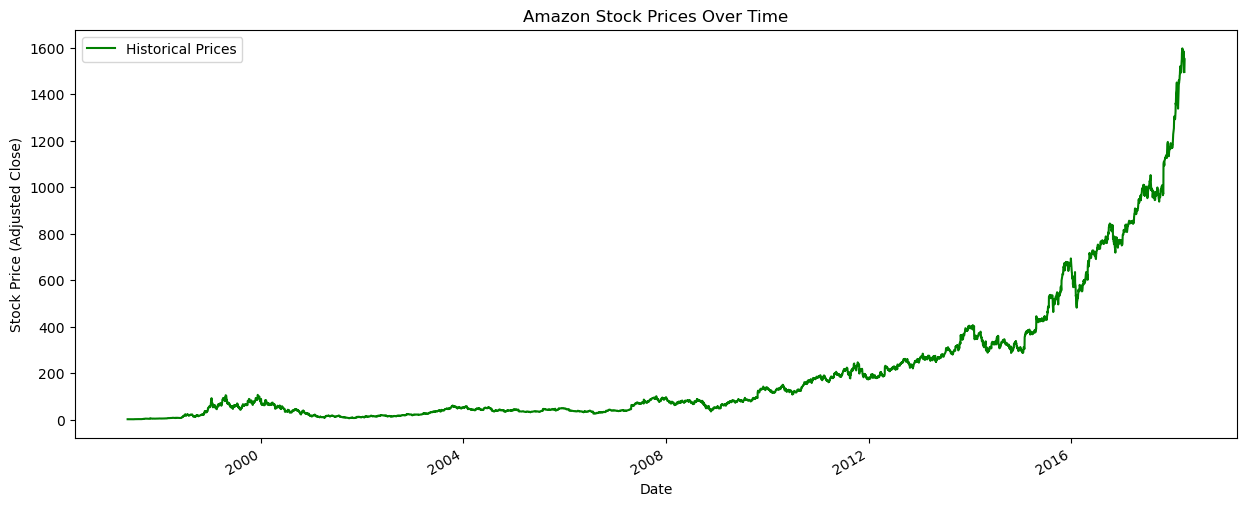

DataFrame with Prediction Column:
             Adj. Close  Prediction
Date                               
1997-05-16     1.729167    1.541667
1997-05-19     1.708333    1.515833
1997-05-20     1.635833    1.588333
1997-05-21     1.427500    1.911667
1997-05-22     1.395833    2.000000
...                 ...         ...
2018-03-21  1581.860000         NaN
2018-03-22  1544.100000         NaN
2018-03-23  1495.560000         NaN
2018-03-26  1555.860000         NaN
2018-03-27  1497.050000         NaN

[5248 rows x 2 columns]

Scaled Feature Matrix X:
[[-0.70904095]
 [-0.70911489]
 [-0.7093722 ]
 ...
 [ 4.59285269]
 [ 4.80686902]
 [ 4.59814099]]

Model Confidence on Test Set: 0.9878742085884308

Predicted Stock Prices for the Forecast Period:
[1502.09699292 1540.98891861 1552.38827614 1538.47701537 1559.40244665
 1574.9102561  1576.86868914 1593.08962367 1616.4524526  1605.84072575
 1606.34097766 1586.11802779 1593.35571512 1618.2192998  1633.15235173
 1640.98608389 1648.28763316 1677.05744

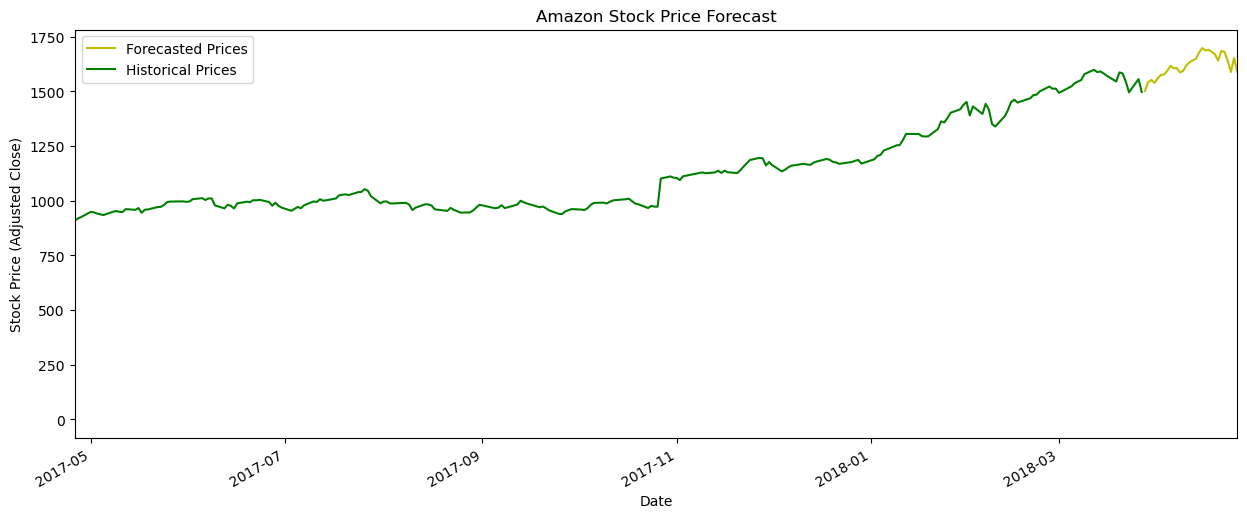

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Set Quandl API key
quandl.ApiConfig.api_key = '88rcrZCfm3JTxMoykixp'

# Retrieve Amazon stock data
df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]

# Plot the historical 'Adj. Close' stock prices
plt.figure(figsize=(15, 6))
df['Adj. Close'].plot(color='g', label='Historical Prices')
plt.title('Amazon Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.legend(loc='upper left')
plt.show()

# Create a 'Prediction' column by shifting 'Adj. Close' values
forecast = 30
df['Prediction'] = df['Adj. Close'].shift(-forecast)

# Display the DataFrame with the 'Prediction' column
print("DataFrame with Prediction Column:")
print(df)

# Prepare the feature matrix X by scaling the features
X = np.array(df.drop(['Prediction'], axis=1))
X = preprocessing.scale(X)

# Display the scaled feature matrix X
print("\nScaled Feature Matrix X:")
print(X)

# Separate features and labels for training and testing
X_forecast = X[-forecast:]
X = X[:-forecast]
y = np.array(df['Prediction'])
y = y[:-forecast]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Linear Regression model
clf = LinearRegression()

# Fit the model on training data
clf.fit(X_train, y_train)

# Evaluate model confidence on the test set
confidence = clf.score(X_test, y_test)
print("\nModel Confidence on Test Set:", confidence)

# Predict stock prices for the forecast period
forecast_predicted = clf.predict(X_forecast)
print("\nPredicted Stock Prices for the Forecast Period:")
print(forecast_predicted)

# Generate dates for the forecast period
dates = pd.date_range(start='2018-03-28', end='2018-04-26')
print("\nDates for the Forecast Period:")
print(dates)

# Plot the predicted stock prices along with historical prices
plt.figure(figsize=(15, 6))
plt.plot(dates, forecast_predicted, color='y', label='Forecasted Prices')
df['Adj. Close'].plot(color='g', label='Historical Prices')
plt.title('Amazon Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.legend(loc='upper left')
plt.xlim(xmin=datetime.date(2017, 4, 26),xmax=datetime.date(2018,4,26))
plt.show()